In [42]:
import keras
import pandas as pd

from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [173]:
## Deal with the missing data 

#read in data
data = pd.read_csv('Data/Cleaned/Non_Prior_Present.csv')
df = data.copy()


In [174]:
df_count = df.shape[0]

In [175]:
del df['prediction_day']

In [176]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'y'], df['y'], \
                                                    test_size = 0.2, shuffle = False)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, \
                                                    test_size = 0.2, shuffle = False)

mean_train = x_train.mean(axis=0)
std_train = x_train.std(axis=0)
x_train = (x_train-mean_train)/std_train
x_val = (x_val-mean_train)/std_train
x_test = (x_train-mean_train)/std_train



In [177]:
# Set up a NN

# define a keras model of a MLP network with three Dense layers
model = Sequential()
model.add(Dense(8, input_dim= x_train.shape[1], activation = 'relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))




In [178]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [179]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=[METRICS])

In [180]:
# train the model
ep = 300
history = model.fit(x_train,y_train, epochs=ep, batch_size=32, validation_data=(x_val, y_val));

Train on 500 samples, validate on 125 samples
Epoch 1/300
500/500 [==============================] - 2s 4ms/step - loss: 0.6933 - tp: 150.0000 - fp: 126.0000 - tn: 100.0000 - fn: 124.0000 - accuracy: 0.5000 - precision: 0.5435 - recall: 0.5474 - auc: 0.5159 - val_loss: 0.6925 - val_tp: 47.0000 - val_fp: 37.0000 - val_tn: 12.0000 - val_fn: 29.0000 - val_accuracy: 0.4720 - val_precision: 0.5595 - val_recall: 0.6184 - val_auc: 0.4713
Epoch 2/300
500/500 [==============================] - 0s 127us/step - loss: 0.6909 - tp: 179.0000 - fp: 145.0000 - tn: 81.0000 - fn: 95.0000 - accuracy: 0.5200 - precision: 0.5525 - recall: 0.6533 - auc: 0.5251 - val_loss: 0.6897 - val_tp: 49.0000 - val_fp: 41.0000 - val_tn: 8.0000 - val_fn: 27.0000 - val_accuracy: 0.4560 - val_precision: 0.5444 - val_recall: 0.6447 - val_auc: 0.4660
Epoch 3/300
500/500 [==============================] - 0s 119us/step - loss: 0.6890 - tp: 194.0000 - fp: 151.0000 - tn: 75.0000 - fn: 80.0000 - accuracy: 0.5380 - precision: 0.5

Text(0.5, 0, 'epoch')

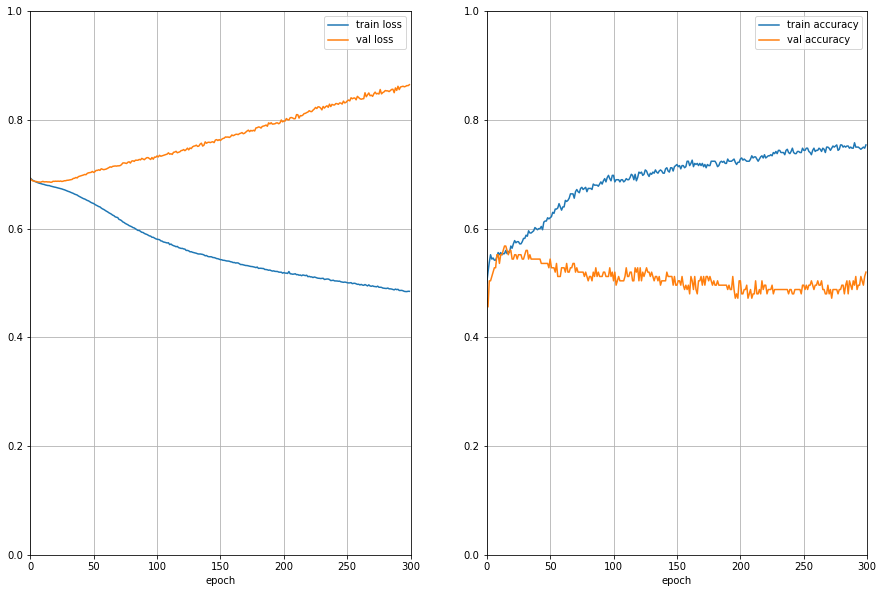

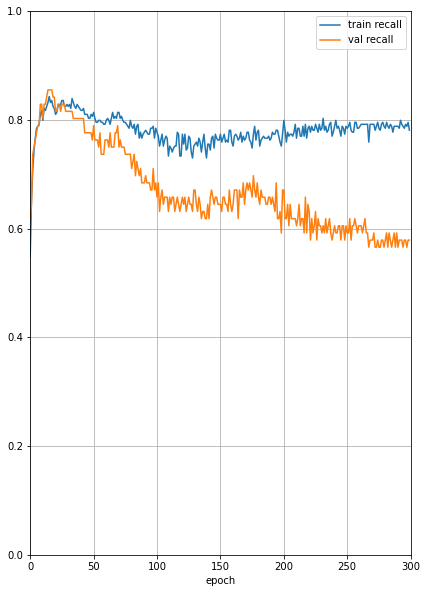

In [181]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,10))
fig.add_subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.grid(True)
plt.xlim([0,ep])
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig.add_subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.grid(True)
plt.xlim([0,ep])
plt.ylim([0,1.0])
plt.xlabel('epoch')

fig = plt.figure(figsize = (15,10))
fig.add_subplot(1,2,1)
plt.plot(history.history['recall'], label='train recall')
plt.plot(history.history['val_recall'], label='val recall')
plt.legend()
plt.grid(True)
plt.xlim([0,ep])
plt.ylim([0,1.0])
plt.xlabel('epoch')

In [ ]:
#is this overfitting